In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Common Coordinate Framework: Template Volume
The anatomical template of CCF v3 is a shape and background signal intensity average of 1675 specimens from the Allen Mouse Brain Connectivity Atlas. Specimens in the Allen Mouse Brain Connectivity Atlas were imaged using a customized serial two-photon (STP) tomography system, which couples high-speed two-photon microscopy with automated vibratome sectioning. STP tomography yields a series of inherently prealigned images amenable for precise 3-D spatial mapping. A population average was created through an iterative process, averaging many brains over multiple cycles. This iterative process was bootstrapped by 12-parameter affine registration of specimens to the “registration template” created as part of the Allen Mouse Brain Connectivity Atlas data processing pipeline. The “registration template” effectively provides initial orientation and size information to this process. To create a symmetric average, each of the 1675 specimens was flipped across the mid-sagittal plane and the flipped specimens were used as additional input to the averaging process. The total 3350 (= 2 x 1675) hemispheres were registered and averaged to create the first iteration of the CCF v3 anatomical template.

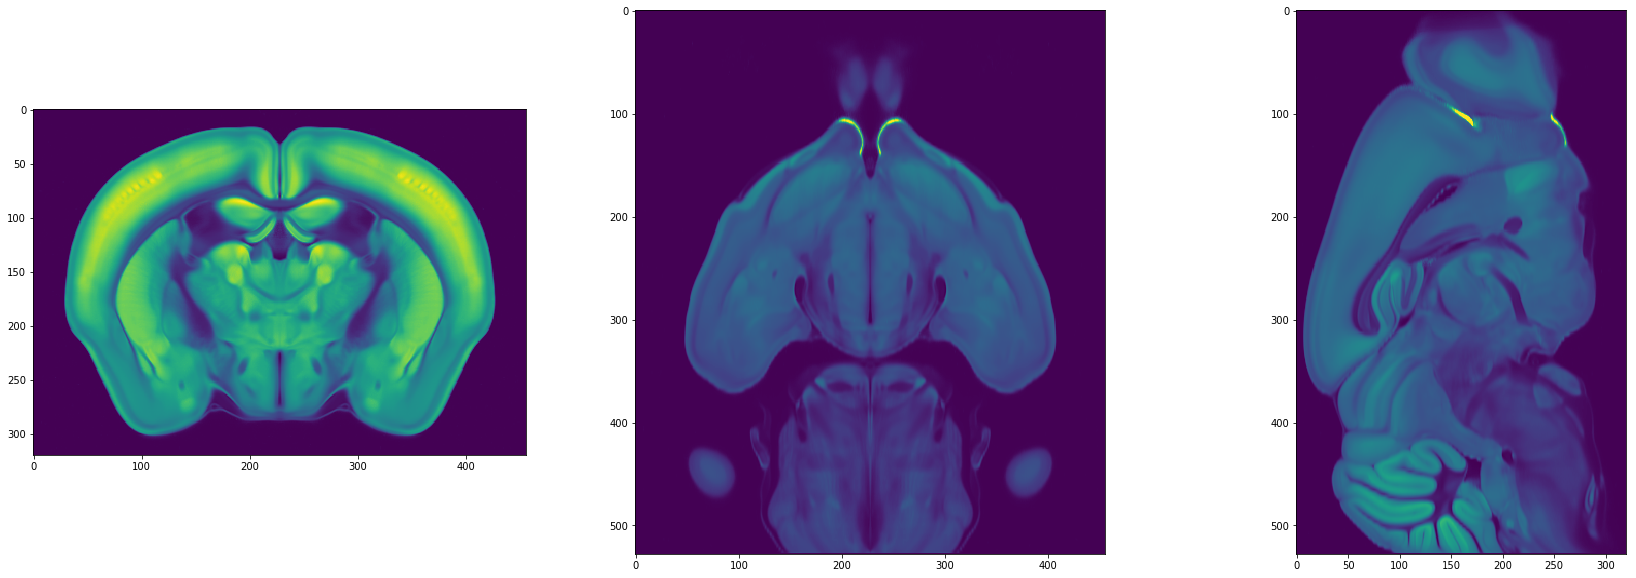

In [2]:
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache
mcc = MouseConnectivityCache(manifest_file='connectivity/mouse_connectivity_manifest.json')

tv, _ = mcc.get_template_volume()
fig, ax = plt.subplots(1,3, figsize=(30,10))
ax[0].imshow(tv[250,:,:])
ax[1].imshow(tv[:,250,:])
ax[2].imshow(tv[:,:,250])
plt.show()

# Acsessing the query engine

The `MouseConnectivityApi` class provides access to an HTTP Client for the Allen Mouse Brain Connectivity Atlas.

In [3]:
from allensdk.api.queries.mouse_connectivity_api import MouseConnectivityApi
mca = MouseConnectivityApi()

# Source Search
To perform a Source Search, a user specifies a set of source structures. The service returns all experiments for which either the primary injection structure or one of its secondary injection structures corresponding to one of the specified source structures or their descendents in the ontology. The search results can also be filtered by a list of transgenic lines.

In [ ]:
qr = mca.experiment_source_search(injection_structures = ['VISp'])
pd.DataFrame(qr).head()

# Target Search
The target search has all the same functional capabilities as Source Search with the added ability to filter your search by limiting the results to experiments where the projection signal passes through a given structure(s).

In [5]:
qr = mca.experiment_source_search(target_domain = ['LGd'])
pd.DataFrame(qr).head()

gender         id injection-coordinates  \
0      M  310035922    [5370, 6860, 5700]   
1      F  306930168    [5020, 7150, 5700]   
2      M  180296424    [9570, 1750, 8510]   
3      M  309372716    [8630, 1370, 7810]   
4      M  306957248    [4980, 6840, 5700]   

                                injection-structures injection-volume  \
0  [{u'abbreviation': u'retina', u'color': u'7F2E...         0.089787   
1  [{u'abbreviation': u'retina', u'color': u'7F2E...         0.059093   
2  [{u'abbreviation': u'VISp', u'color': u'08858C...         0.800079   
3  [{u'abbreviation': u'VISp', u'color': u'08858C...         0.908778   
4  [{u'abbreviation': u'retina', u'color': u'7F2E...         0.124325   

                   name  num-voxels  product-id    strain structure-abbrev  \
0  JAM-CreF3xFLP-160596         706          31                     retina   
1          Thy1-Cre-136         706          31                     retina   
2              378-1815         706           5  C57BL/6J             VISp   
3        C57BL/6-155461         706           5  C57BL/6J             VISp   
4          Thy1-Cre-137         706          31                     retina   

  structure-color  structure-id       structure-name      sum transgenic-line  
0          7F2E7E     304325711               retina  0.36467        Jam2-Cre  
1          7F2E7E     304325711               retina  0.25535        Thy1-Cre  
2          08858C           385  Primary visual area  0.24071                  
3          08858C           385  Primary visual area  0.23578                  
4          7F2E7E     304325711               retina  0.23124        Thy1-Cre

# Injection Coordinate Search
To perform an Injection Coordinate Search, a user specifies a seed location within the 3D reference space. The service returns a rank list of experiments by distance of its injection site to the specified seed location.

In [6]:
qr = mca.experiment_injection_coordinate_search(seed_point=[9570, 1750, 8510], injection_structures = ['MOp'])
pd.DataFrame(qr).head()

distance gender         id injection-coordinates  \
0  4117.147      F  182616478    [5900, 1130, 6750]   
1  4324.639      F  157909001    [5480, 1870, 7110]   
2  4337.073      M  156786234    [5470, 1860, 7100]   
3  4358.509      F  179640955    [5420, 1290, 7260]   
4  4431.354      M  166082842    [5400, 1510, 7030]   

                                injection-structures injection-volume  \
0  [{u'abbreviation': u'SSp-ll', u'color': u'1880...         0.176271   
1  [{u'abbreviation': u'SSp-ll', u'color': u'1880...         0.024158   
2  [{u'abbreviation': u'SSp-ll', u'color': u'1880...         0.148883   
3  [{u'abbreviation': u'SSp-ll', u'color': u'1880...         0.007110   
4  [{u'abbreviation': u'SSp-ll', u'color': u'1880...         0.142203   

                  name  product-id    strain structure-abbrev structure-color  \
0    Cux2-IRES-Cre-148           5                        MOp          1F9D5A   
1       Ntsr1-Cre-3531           5  C57BL/6J              MOp          1F9D5A   
2         Syt6-Cre-609           5  C57BL/6J              MOp          1F9D5A   
3  Scnn1a-Tg3-Cre-4816           5    B6.C3H              MOp          1F9D5A   
4          Rbp4-Cre-93           5                        MOp          1F9D5A   

   structure-id      structure-name  transgenic-line  
0           985  Primary motor area    Cux2-IRES-Cre  
1           985  Primary motor area  Ntsr1-Cre_GN220  
2           985  Primary motor area   Syt6-Cre_KI148  
3           985  Primary motor area   Scnn1a-Tg3-Cre  
4           985  Primary motor area   Rbp4-Cre_KL100